## Importing libraries

In [14]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [15]:
# loading benin-malanville dataset
df = pd.read_csv("../data/benin-malanville.csv")

## Summary Statistics & Missing Values

In [16]:
# Display basic info
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nPercentage of Missing Values:")
print((df.isna().sum() / len(df) * 100).round(2))
print("\nMissing Values:")
print(df.isna().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Timestamp         525600 non-null  object 
 1    GHI              525600 non-null  float64
 2    DNI              525600 non-null  float64
 3    DHI              525600 non-null  float64
 4    ModA             525600 non-null  float64
 5    ModB             525600 non-null  float64
 6    Tamb             525600 non-null  float64
 7    RH               525600 non-null  float64
 8    WS               525600 non-null  float64
 9    WSgust           525600 non-null  float64
 10   WSstdev          525600 non-null  float64
 11   WD               525600 non-null  float64
 12   WDstdev          525600 non-null  float64
 13   BP               525600 non-null  int64  
 14   Cleaning         525600 non-null  int64  
 15   Precipitation    525600 non-null  float64
 16  TModA 

In [17]:
# Check for missing values
missing = df.isna().sum()
missing[missing > 0]

Series([], dtype: int64)

# Outlier Detection & Basic Cleaning

In [18]:
null_threshold = 0.05 * len(df)
missing[missing > null_threshold]

Series([], dtype: int64)

In [19]:
# Relevant columns
cols = [' GHI  ', ' DNI  ', ' DHI  ', ' ModA  ', ' ModB  ', ' WS  ', ' WSgust']

# Compute Z-scores
z_scores = df[cols].apply(zscore)
# print(df.columns.tolist())

# Flaging row more than |Z| > 3

In [20]:
outliers = (z_scores.abs() > 3).sum()
print(outliers)  # Number of outliers per column

GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64


In [21]:
# Impute missing values with median
for col in cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


In [ ]:
## save the cleaned data
df.to_csv("../data/benin_clean.csv", index=False)

## Time Series Analysis

Text(0, 0.5, 'Values')

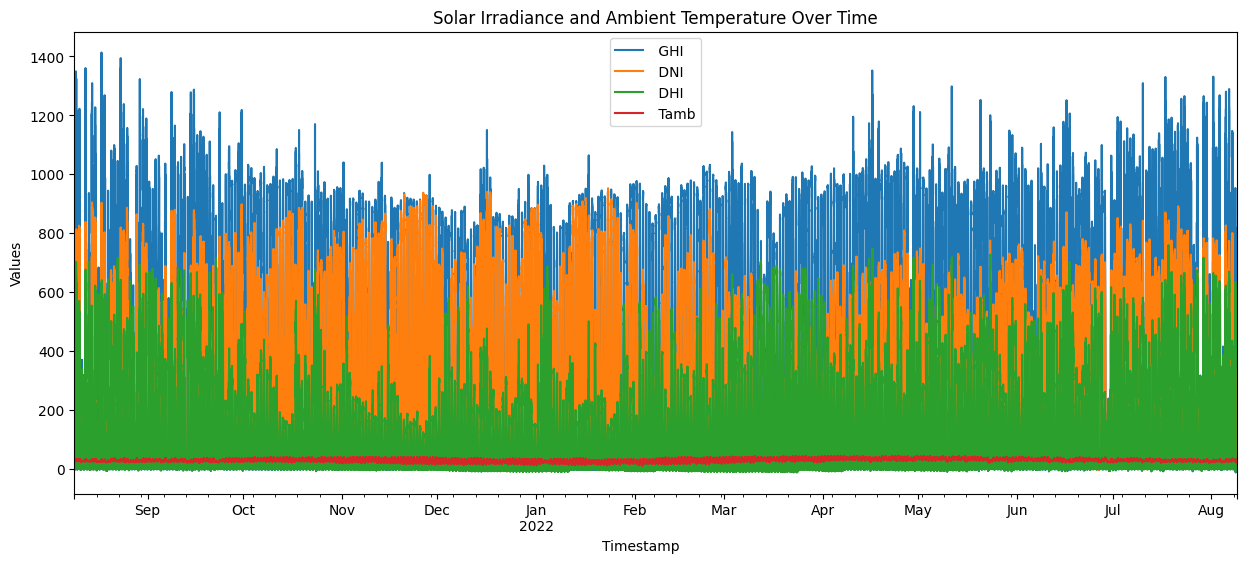

In [23]:
df["Timestamp       "] = pd.to_datetime(df["Timestamp       "])

# setting the index to Timestamp
df.set_index("Timestamp       ", inplace=True)

plot_cols = [' GHI  ', ' DNI  ', ' DHI  ', ' Tamb']
#Plotting
df[plot_cols].plot(figsize=(15, 6))
plt.title("Solar Irradiance and Ambient Temperature Over Time")
plt.ylabel("Values")

Text(0, 0.5, 'W/m²')

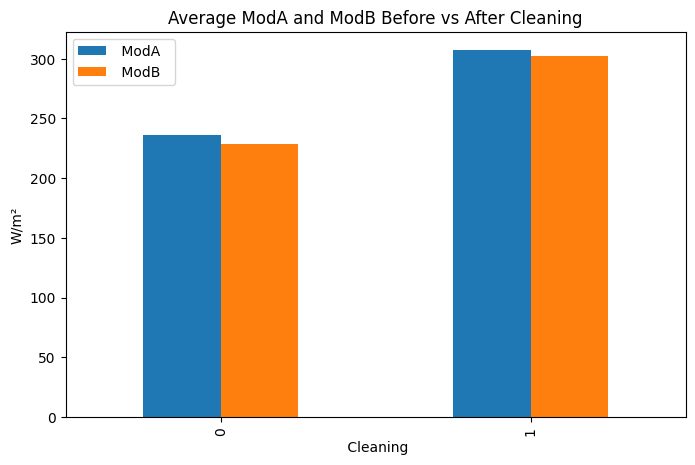

In [24]:
# Group by cleaning status (0 or 1)
cleaning_impact = df.groupby(' Cleaning')[[' ModA  ', ' ModB  ']].mean()

# Bar plot
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB Before vs After Cleaning')
plt.ylabel('W/m²')

Text(0.5, 1.0, 'Correlation Heatmap')

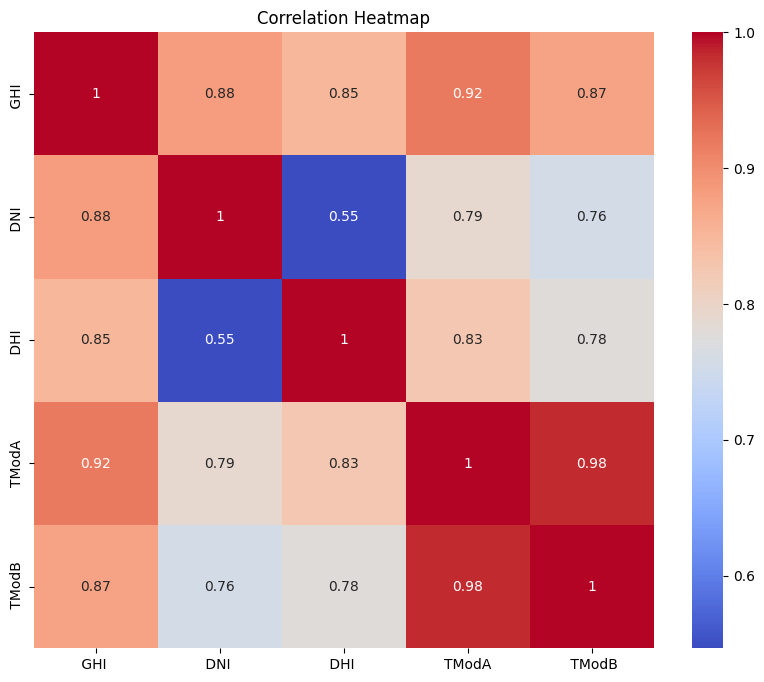

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[[' GHI  ', ' DNI  ', ' DHI  ', 'TModA', ' TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Humidity vs Ambient Temp')

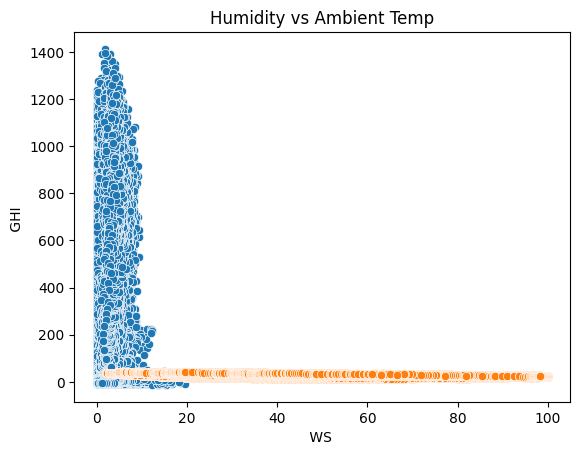

In [26]:
sns.scatterplot(data=df, x=' WS  ', y=' GHI  ')
plt.title('Wind Speed vs GHI')

sns.scatterplot(data=df, x=' RH   ', y=' Tamb')
plt.title('Humidity vs Ambient Temp')

## Wind and Distribution Analysis

Text(0.5, 0, 'W/m²')

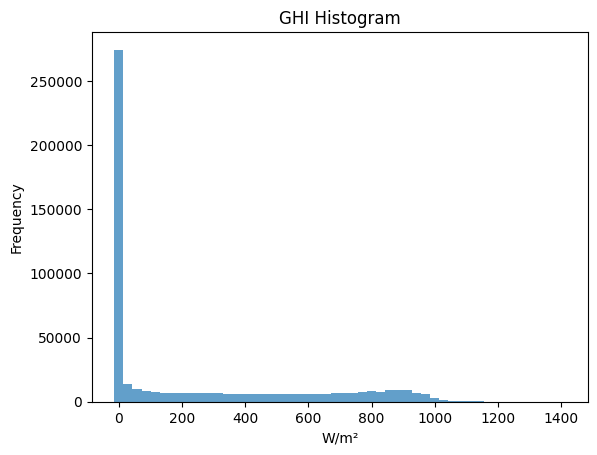

In [27]:
df[' GHI  '].plot.hist(bins=50, alpha=0.7, title='GHI Histogram')
plt.xlabel('W/m²')

## Temperature Analysis

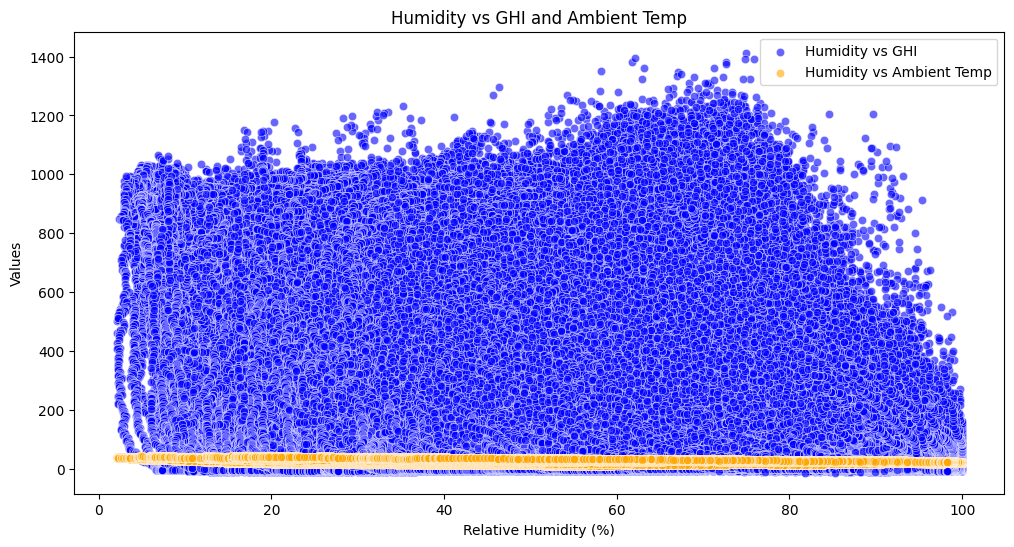

In [28]:
plt.figure(figsize=(12, 6))

# Humidity vs GHI
sns.scatterplot(data=df, x=' RH   ', y=' GHI  ', color='blue', alpha=0.6, label='Humidity vs GHI')
plt.title('Humidity vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')
plt.legend()

# Humidity vs Ambient Temp
sns.scatterplot(data=df, x=' RH   ', y=' Tamb', color='orange', alpha=0.6, label='Humidity vs Ambient Temp')
plt.title('Humidity vs GHI and Ambient Temp')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Values')
plt.legend()

Text(0.5, 1.0, 'GHI vs Temperature (bubble size = RH)')

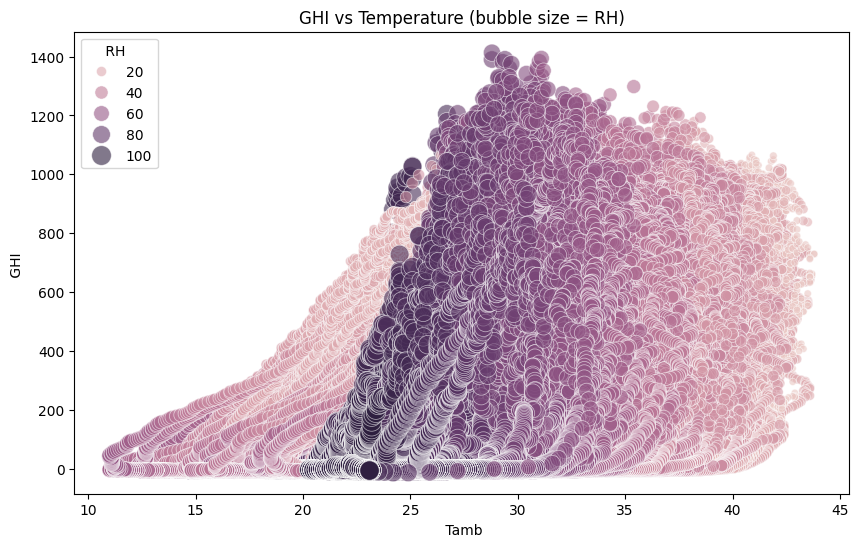

In [29]:
# Bubble chart: GHI vs Tamb, bubble = RH
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=' Tamb', y=' GHI  ', size=' RH   ', hue=' RH   ', alpha=0.6, sizes=(20, 200))
plt.title('GHI vs Temperature (bubble size = RH)')